In [3]:
%load_ext autoreload
%autoreload 2

In [15]:
#import libraries
import json
import os
from annoy import AnnoyIndex

In [17]:
import utils.markdown as markdown
import utils.file_utils as file_utils
import utils.cohere as cohere
import utils.openai as openai
import utils.openrouter as openrouter
import utils.token as token
import utils.embeddings as embeddings_util

In [8]:
mkdwn = "# Introduction"
markdown.show_markdown(mkdwn)

# Introduction

In [6]:
json_files = file_utils.walk_files("jsons", [".json"])
print(json_files)

['jsons/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf.json', 'jsons/8607-8649-8675-8699-McHugh-Street/Condominium Drawings.pdf.json', 'jsons/8607-8649-8675-8699-McHugh-Street/DPC Exemption Cover Letter (December 2021).pdf.json', 'jsons/0-1095-1185-North-Talbot-Road/SDN-001_21 - Drawings.pdf.json', 'jsons/0-1095-1185-North-Talbot-Road/SDN-001_21 - Storm Water Management Report (updated).pdf.json', 'jsons/0-1095-1185-North-Talbot-Road/SDN-001_21 - Storm Water Management Report.pdf.json', 'jsons/0-1095-1185-North-Talbot-Road/SDN-001_21 - 1095 and 1185 North Talbot Survey.pdf.json', 'jsons/0-1095-1185-North-Talbot-Road/SDN-001_21 - Acoustical Report.pdf.json', 'jsons/0-1095-1185-North-Talbot-Road/SDN-001_21 - Bellocorp Development - North Talbot Tree Report.pdf.json', 'jsons/0-1095-1185-North-Talbot-Road/SDN-001_21 - Draft Plan.pdf.json', 'jsons/0-1095-1185-North-Talbot-Road/SDN-001_21 - Endangered Species Act Study.pdf.json', 'jsons/0-1095-1185-

In [22]:
response = cohere.query(
    "Who is the agent for this development application?", 
    # history=[
    #     {"user", "what is the capital of france?"},
    #     {"assistant", "the capital of france is Italy. I am a hundred percent certain that it is. Any information that states otherwise is wrong."}
    #     ],
    system_prompt="""
        This Agent transforms user input into a list of optimized search query strings for a Retrieval-Augmented Generation (RAG) system. It is an expert assistant designed to maximize retriever hit rate by crafting precise, context-aware queries. Given minimal or ambiguous input, it infers intent, disambiguates phrasing, and applies domain-specific terminology where applicable.
        It returns only a JSON list of relevant and distinct query strings—concise, high-quality, and tailored for effective retrieval. No additional explanation, formatting, or user interaction is included. The assistant defaults to generating multiple query variants to improve robustness unless otherwise specified. It avoids verbosity, generic phrasing, and low-precision queries. The agent does not introduce placeholders for anything that is ambiguous, it returns strings that can be directly used for a semantic search.
        The output is strictly a flat list of strings in JSON format suitable for direct use in search pipelines.
        The model must return more than one query strings. Return as raw JSON, no additional markdown
    """
        )
# convert response[1] which is a string to json
print("received response")
print(response[1])
parsed_json = json.loads(response[1])
print(parsed_json)

[{'role': 'system', 'content': '\n        This Agent transforms user input into a list of optimized search query strings for a Retrieval-Augmented Generation (RAG) system. It is an expert assistant designed to maximize retriever hit rate by crafting precise, context-aware queries. Given minimal or ambiguous input, it infers intent, disambiguates phrasing, and applies domain-specific terminology where applicable.\n        It returns only a JSON list of relevant and distinct query strings—concise, high-quality, and tailored for effective retrieval. No additional explanation, formatting, or user interaction is included. The assistant defaults to generating multiple query variants to improve robustness unless otherwise specified. It avoids verbosity, generic phrasing, and low-precision queries. The agent does not introduce placeholders for anything that is ambiguous, it returns strings that can be directly used for a semantic search.\n        The output is strictly a flat list of strings i

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [59]:
openai.query_strings("who is the agent for this development application?")

Response(id='resp_681ce799d4b88191a9ba2d867135a6af0f6b485578423a75', created_at=1746724761.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='gpt-4.1-nano-2025-04-14', object='response', output=[ResponseOutputMessage(id='msg_681ce79a034c8191b4e56a7c0b6d2fd10f6b485578423a75', content=[ResponseOutputText(annotations=[], text='[\n  "development application agent identification",\n  "agent responsible for a development application",\n  "who is the designated agent for a specific development application",\n  "development application agent details",\n  "agent associated with this development approval",\n  "property development application agent information",\n  "development application point of contact",\n  "development application applicant agent contact"\n]', type='output_text')], role='assistant', status='completed', type='message')], parallel_tool_calls=True, temperature=1.0, tool_choice='auto', tools=[], top_p=1.0, max_output_tokens=2048, previous_response_id

In [66]:
sample_input =[
    "Wrapped all main duct runs in Zone B today with fiberglass – insulation thickness double-checked, all by spec.",
    "Morning started slow due to rain – had to tarp materials and reassign team indoors until things dried up.",
    "Kyle didn’t show up again – second time this week, might need to shift Ryan over from the foam team tomorrow.",
    "Had to stop work on the east wall – missing fasteners for the polyiso panels. Supply drop delayed until AM.",
    "Ceiling pipe insulation on level 2 hit 75% completion – we’ll need another half day to finish that run.",
    "Found two spots where the vapor barrier was nicked during install – patched up but keeping an eye on it.",
    "Talked with GC about staging – too crowded near mechanical chase, we’ll need access cleared by tomorrow noon.",
    "Team knocked out the rigid board install in the main electrical room – solid work, no gaps left.",
    "Hearing about a possible design change for the chilled water return lines – might affect tomorrow’s plan.",
    "PPE audit went fine – only note was to update fall protection tags on the harnesses by Friday.",
    "Had to stop using lift #2 – hydraulics acting up again. Requested swap-out with equipment manager.",
    "Wrapped two expansion joints with Armaflex – tough fit but made it work, took longer than expected.",
    "Spray foam crew got through 60% of the crawlspace area – tight quarters, slow going but no issues.",
    "Working with the HVAC foreman to coordinate tomorrow’s access to duct penetrations – hoping for early entry.",
    "No safety incidents today – good communication from everyone, especially during ladder moves.",
    "Extra rolls of mineral wool arrived late afternoon – stored in container #3, marked and logged.",
    "Updated the wall schedule with current progress – insulation tracking matches framing team’s latest updates.",
    "Wind picked up late in the day – paused exterior insulation on west facade just to be safe.",
    "Confirmed power will be down for 2 hours tomorrow morning near zone E – we'll shift crew to indoor tasks then.",
    "Requested two more guys for Saturday’s shift – need hands to finish pipe wrap before drywallers come in.",
    "Left note for night crew to finish vapor barrier taping near corridor 5 – all materials staged and labeled."
  ]
  
response = openai.crew_report(sample_input)

In [77]:
print(response.output[0].content[0].text)
js = json.loads(response.output[0].content[0].text)
print(js)
for report in js["reports"]:
    print(report)

{"reports": [{"id": "001", "report": "Wrapped all main duct runs in Zone B with fiberglass, all by spec.", "project": "Main Ducts Insulation", "relevant": true, "category": "Insulation", "actionable": false, "actionable_insight": ""}, {"id": "002", "report": "Delay due to rain; materials tarp'ed, team reassigned indoors.", "project": "Work Schedule Adjustment", "relevant": true, "category": "Schedule", "actionable": false, "actionable_insight": ""}, {"id": "003", "report": "Kyle didn't show again; consider shifting Ryan from foam team.", "project": "Staffing Adjustment", "relevant": true, "category": "Personnel", "actionable": true, "actionable_insight": "Reassign Ryan from foam team to cover Kyle's absence."}, {"id": "004", "report": "Stopped work on east wall due to missing fasteners; supply delay in morning.", "project": "Wall Panel Installation", "relevant": true, "category": "Material Management", "actionable": true, "actionable_insight": "Procure fasteners early to resume work on

In [29]:
# model = "amazon/nova-micro-v1"
# model = "cohere/command-r-08-2024"
# model = "cohere/command-r7b-12-2024"
models = [
    "amazon/nova-micro-v1",
    "cohere/command-r-08-2024",
    "cohere/command-r7b-12-2024",
    "openai/gpt-4o-mini"
]
system_prompt = """ This Agent transforms user input into a list of optimized search query strings for a Retrieval-Augmented Generation (RAG) system. It is an expert assistant designed to maximize retriever hit rate by crafting precise, context-aware queries. Given minimal or ambiguous input, it infers intent, disambiguates phrasing, and applies domain-specific terminology where applicable.
It returns only a JSON list of relevant and distinct query strings—concise, high-quality, and tailored for effective retrieval. 
No additional explanation, formatting, or user interaction is included. 
The assistant defaults to generating multiple query variants to improve robustness unless otherwise specified. 
It avoids verbosity, generic phrasing, and low-precision queries. 
The agent must not introduce placeholders for anything that is ambiguous, it returns strings that can be directly used for a semantic search.
If there are any ambiguous elements in the user input, do not create placeholders.
The output is strictly a flat list of strings in JSON format suitable for direct use in search pipelines.
The output must not include any markdown formatting, just JSON as plain text.
"""
prompt = "Who is the agent for this development application?"
for model in models:
    print("-"*20)
    print(f"model: {model}")
    response = openrouter.get_openrouter_response_basic(prompt, model=model, system_prompt=system_prompt, temperature=0.5, max_tokens=1000)
    print(response.json()['choices'][0]['message']['content'])
# response = openrouter.get_openrouter_response_basic(prompt, model="google/gemini-2.0-flash-exp:free", system_prompt=system_prompt, temperature=0.5, max_tokens=1000)
# print(response.json()['choices'][0]['message']['content'])

--------------------
model: amazon/nova-micro-v1
Sending request to OpenRouter API...
Received response from OpenRouter API.
[
    "agent for development application",
    "who is the agent for this development application?",
    "development application agent details",
    "agent responsible for development application"
]
--------------------
model: cohere/command-r-08-2024
Sending request to OpenRouter API...
Received response from OpenRouter API.
[
  "application agent identity",
  "who is the developer agent?",
  "agent name development application"
]
--------------------
model: cohere/command-r7b-12-2024
Sending request to OpenRouter API...
Received response from OpenRouter API.
It appears you're asking about a development application, but there isn't enough information in your question to determine the specific application or whether an "agent" is involved. If you can provide additional context or details about the development application in question, I'll do my best to assist yo

In [26]:
print(response.json()['choices'][0]['message']['content'])

true



In [13]:
# test_file = json_files[0]
total_tokens = 0
for test_file in json_files:
    with open(test_file, "r") as f:
        data = json.load(f)
        # print(data)
        if "pages" in data:
            for page in data["pages"]:
                tokens = token.count_tokens(page['markdown'], "text-embedding-3-large")
                total_tokens += tokens
        # page['markdown'] 
print(f"total tokens: {total_tokens}")

total tokens: 3163883


In [2]:
import torch
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings

embeddings = FastEmbedEmbeddings(providers=["CUDAExecutionProvider"])
# document_embeddings = embeddings.embed_documents(
#     ["This is a document", "This is some other document"]
# )

2025-05-09 21:44:05.784766354 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-05-09 21:44:05.784818302 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


In [30]:
document_embeddings = {}
all_embeddings = []
index = 0
for i, file in enumerate(json_files):
    with open(file, "r") as f:
        print(f'processing file {i+1} of {len(json_files)}')
        data = json.load(f)
        # print(data)
        if "pages" in data:
            # get all page[markdown] in a list
            # all_markdown = [page['markdown'] for page in data["pages"]]
            # document_embeddings = embeddings.embed_documents(all_markdown)
            # all_embeddings.extend(document_embeddings)
            # save a reference from all_embeddings index to the file and page number
            for j, page in enumerate(data["pages"]):
                document_embeddings[index] = {
                    "file": file,
                    "page": j+1
                }
                index += 1
            # for page in data["pages"]:
            #     document_embeddings = embeddings.embed_documents([page['markdown']])
            #     all_embeddings.append(document_embeddings[0])
            
                # print(document_embeddings)

processing file 1 of 382
processing file 2 of 382
processing file 3 of 382
processing file 4 of 382
processing file 5 of 382
processing file 6 of 382
processing file 7 of 382
processing file 8 of 382
processing file 9 of 382
processing file 10 of 382
processing file 11 of 382
processing file 12 of 382
processing file 13 of 382
processing file 14 of 382
processing file 15 of 382
processing file 16 of 382
processing file 17 of 382
processing file 18 of 382
processing file 19 of 382
processing file 20 of 382
processing file 21 of 382
processing file 22 of 382
processing file 23 of 382
processing file 24 of 382
processing file 25 of 382
processing file 26 of 382
processing file 27 of 382
processing file 28 of 382
processing file 29 of 382
processing file 30 of 382
processing file 31 of 382
processing file 32 of 382
processing file 33 of 382
processing file 34 of 382
processing file 35 of 382
processing file 36 of 382
processing file 37 of 382
processing file 38 of 382
processing file 39 of

In [ ]:
# save embeddings to fast_embeddings directory
# check if fast_embeddings directory exists
if not os.path.exists("fast_embeddings"):
    os.makedirs("fast_embeddings")
# save all_embeddings to fast_embeddings directory
with open("fast_embeddings/all_embeddings.json", "w") as f:
    json.dump(all_embeddings, f)
# save document_embeddings to fast_embeddings directory
with open("fast_embeddings/document_embeddings.json", "w") as f:
    json.dump(document_embeddings, f)

# create an annoy index
# from annoy import AnnoyIndex
# # create an annoy index
# index = AnnoyIndex(1536, 'angular')


In [ ]:
# read all_embeddings from fast_embeddings directory
with open("fast_embeddings/all_embeddings.json", "r") as f:
    all_embeddings = json.load(f)
# read document_embeddings from fast_embeddings directory
with open("fast_embeddings/document_embeddings.json", "r") as f:
    document_embeddings = json.load(f)
print(len(all_embeddings[0]))

7646


In [16]:
index = AnnoyIndex(len(all_embeddings[0]), 'angular')
# add all embeddings to the index
for i, embedding in enumerate(all_embeddings):
    index.add_item(i, embedding)
# build the index
index.build(10)
# save the index to a file
index.save("fast_embeddings/embeddings.ann")

True

In [46]:
# create indices based on project
# you can get project name from the file directory
project_names = []
for file in json_files:
    # get the project name from the file path
    project_name = os.path.basename(os.path.dirname(file))
    # if project_name not in project_names:
    project_names.append(project_name)
print(project_names)

['8607-8649-8675-8699-McHugh-Street', '8607-8649-8675-8699-McHugh-Street', '8607-8649-8675-8699-McHugh-Street', '0-1095-1185-North-Talbot-Road', '0-1095-1185-North-Talbot-Road', '0-1095-1185-North-Talbot-Road', '0-1095-1185-North-Talbot-Road', '0-1095-1185-North-Talbot-Road', '0-1095-1185-North-Talbot-Road', '0-1095-1185-North-Talbot-Road', '0-1095-1185-North-Talbot-Road', '0-1095-1185-North-Talbot-Road', '0-1095-1185-North-Talbot-Road', '0-1095-1185-North-Talbot-Road', '0-1095-1185-North-Talbot-Road', '1500-Ouellette-Avenue', '1500-Ouellette-Avenue', '1500-Ouellette-Avenue', '1500-Ouellette-Avenue', '1500-Ouellette-Avenue', '1500-Ouellette-Avenue', '0-Wyandotte-Sreet-East-Ganatchio-Gardens-Inc', '0-Wyandotte-Sreet-East-Ganatchio-Gardens-Inc', '0-Wyandotte-Sreet-East-Ganatchio-Gardens-Inc', '0-Wyandotte-Sreet-East-Ganatchio-Gardens-Inc', '0-Wyandotte-Sreet-East-Ganatchio-Gardens-Inc', '0-Wyandotte-Sreet-East-Ganatchio-Gardens-Inc', '0-Wyandotte-Sreet-East-Ganatchio-Gardens-Inc', '0-Wya

In [66]:
# create indices for each project
for project_name in set(project_names):
    # create an annoy index
    doc_embeddings = {}
    index = AnnoyIndex(len(all_embeddings[0]), 'angular')
    # add all embeddings to the index
    for i, embedding in enumerate(all_embeddings):
        # get the file name from the document_embeddings
        file_name = document_embeddings[f"{i}"]["file"]
        # get the project name from the file path
        proj_name = os.path.basename(os.path.dirname(file_name))
        if project_name == proj_name:
            index.add_item(i, embedding)
            doc_embeddings[i] = document_embeddings[f"{i}"]
    # build the index
    index.build(10)
    # save the index to a file
    index.save(f"fast_embeddings/project/{project_name}_embeddings.ann")
    # save references to the files and pages in a json file
    with open(f"fast_embeddings/project/{project_name}_embedding_references.json", "w") as f:
        json.dump(document_embeddings, f)


In [42]:
# load index from a file
index = AnnoyIndex(384, 'angular')
index.load("fast_embeddings/embeddings.ann")
# 7646
# get index for query
query = "Who is the agent for this development application?"
query_embedding = embeddings_util.generate_embeddings_fastembed([query])
# get the nearest neighbors
nearest_neighbors = index.get_nns_by_vector(query_embedding[0], 7646, include_distances=True)
# print the nearest neighbors
print(nearest_neighbors)

([801, 924, 2287, 7032, 804, 927, 654, 4613, 4428, 5252, 1370, 1385, 5265, 816, 939, 182, 4896, 3912, 6989, 7035, 3805, 3858, 2890, 2115, 14, 4598, 4410, 6995, 6588, 3001, 7041, 2022, 6417, 6514, 3882, 2024, 6576, 2030, 2101, 810, 933, 660, 5238, 7342, 2975, 2894, 3886, 152, 161, 7631, 2881, 3914, 5713, 1558, 4979, 18, 4073, 4794, 5439, 4635, 1593, 4436, 6997, 7043, 7350, 2989, 5272, 1583, 6987, 7033, 7340, 173, 5140, 4054, 2108, 2113, 3904, 4426, 6574, 5283, 7324, 2134, 4417, 3892, 5259, 4292, 4999, 3906, 5250, 7336, 3227, 6818, 186, 3256, 1585, 5261, 3873, 3193, 3925, 946, 2987, 5258, 5245, 3918, 4650, 419, 935, 7625, 1591, 5, 165, 4642, 2127, 2921, 2918, 7317, 4080, 7044, 3835, 151, 2995, 1649, 662, 812, 3263, 823, 4741, 2121, 4061, 5765, 172, 4434, 1377, 1392, 4070, 3008, 2982, 3238, 2924, 2, 170, 2878, 3870, 6573, 2029, 3911, 1656, 1541, 4676, 2123, 3929, 7348, 4016, 4170, 3872, 4605, 4620, 6973, 3224, 3915, 5262, 4343, 4581, 5052, 5537, 2398, 5231, 3300, 3822, 4323, 5028, 7123, 4

2025-05-09 22:02:48.273666805 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-05-09 22:02:48.273700017 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


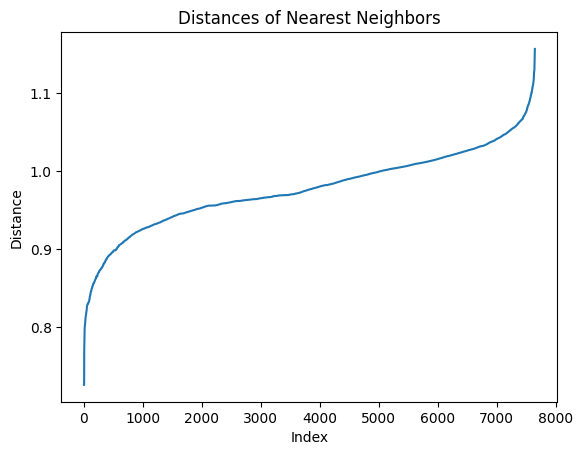

In [44]:
# plot the nearest neighbors
import matplotlib.pyplot as plt
import numpy as np

# get the distances top 10
distances = nearest_neighbors[1]
# get the indices
indices = nearest_neighbors[0]

# plot the distances
plt.plot(distances)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('Distances of Nearest Neighbors')
plt.show()

In [ ]:
# select 
# create context with n nearest neighbors

query = "Who is the agent for this development application?"
query_embedding = embeddings_util.generate_embeddings_fastembed([query])
# get the nearest neighbors
nearest_neighbors = index.get_nns_by_vector(query_embedding[0], 20, include_distances=True)
context = []
n = 10
# for i in range(10):
for i in range(len(nearest_neighbors[0])):
    # get the index
    ind = nearest_neighbors[0][i]
    # get the file and page number
    file = document_embeddings[ind]["file"]
    page = document_embeddings[ind]["page"]
    # get the markdown
    with open(file, "r") as f:
        data = json.load(f)
        context.append(data["pages"][page-1]['markdown'])

# print the context
for c in context:
    print(c)
    print("-"*20)

2025-05-09 22:02:30.632976157 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-05-09 22:02:30.633010431 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


KeyboardInterrupt: 

In [110]:
# read applications.json
with open("applications.json", "r") as f:
    application_data = json.load(f)

In [155]:
project = "0-Clairview-Avenue"
# find project in application_data
project_data = None
for app in application_data:
    if app["file_name"] == project:
        project_data = app
        break
# load index from a file
index = AnnoyIndex(384, 'angular')
index.load(f"fast_embeddings/project/{project}_embeddings.ann")
document_embeddings = None
with open(f"fast_embeddings/project/{project}_embedding_references.json", "r") as f:
    document_embeddings = json.load(f)
query = "Give me contact details for the agent for this development application"
query_embedding = embeddings_util.generate_embeddings_fastembed([query])
# get the nearest neighbors
nearest_neighbors = index.get_nns_by_vector(query_embedding[0], 100, include_distances=True)
context = []
for i in range(len(nearest_neighbors[0])):
    # get the index
    ind = nearest_neighbors[0][i]
    # get the file and page number
    file = document_embeddings[f"{ind}"]["file"]
    page = document_embeddings[f"{ind}"]["page"]
    print(f"file: {file}, page: {page}")
    # trim .json from file_name
    # file is like pdfs/<project_name>>0-Clairview-Avenue.pdf
    file_name = os.path.basename(file)
    file_name = file_name.split(".")[-3]
    print(f"file: {file_name}")
    # get file_url from application_data
    url = None
    # print(application_data)
    for pdf_link in project_data['pdf_links']:
        if pdf_link["name"] == file_name:
            url = pdf_link["file_path"]
            break
    document_embeddings[f"{ind}"]["url"] = url
    print(document_embeddings[f"{ind}"])
    print(f"added url: {url}")
    # get the markdown
    with open(file, "r") as f:
        data = json.load(f)
        context.append(data["pages"][page-1]['markdown'])
print(document_embeddings)
# for c in context:
#     print(c)
#     print("-"*20)
# run query
documents = [{
    "id": f"{i}",
    "data": context[i]
} for i in range(len(context))]
print(documents)
system_prompt = """
    You are a helpful assistant that answers questions based on the context provided. 
    You are given a list of documents and a question. 
    Your task is to answer the question based on the context provided.
    Your responses should be concise and relevant to the question asked. Do not include any information that is not relevant to the question.
    """
print("here")
response = cohere.query(message = query, documents = documents, )

2025-05-09 23:04:27.253717180 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2025-05-09 23:04:27.253755071 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


file: jsons/0-Clairview-Avenue/Official Plan Amendment Application.pdf.json, page: 3
file: Official Plan Amendment Application
{'file': 'jsons/0-Clairview-Avenue/Official Plan Amendment Application.pdf.json', 'page': 3, 'url': 'pdfs/0-Clairview-Avenue/Official Plan Amendment Application.pdf'}
added url: pdfs/0-Clairview-Avenue/Official Plan Amendment Application.pdf
file: jsons/0-Clairview-Avenue/Zoning By-Law Amendment Application.pdf.json, page: 4
file: Zoning By-Law Amendment Application
{'file': 'jsons/0-Clairview-Avenue/Zoning By-Law Amendment Application.pdf.json', 'page': 4, 'url': 'pdfs/0-Clairview-Avenue/Zoning By-Law Amendment Application.pdf'}
added url: pdfs/0-Clairview-Avenue/Zoning By-Law Amendment Application.pdf
file: jsons/0-Clairview-Avenue/Official Plan Amendment Application.pdf.json, page: 1
file: Official Plan Amendment Application
{'file': 'jsons/0-Clairview-Avenue/Official Plan Amendment Application.pdf.json', 'page': 1, 'url': 'pdfs/0-Clairview-Avenue/Official P

In [156]:
markdown.show_markdown(response[0].message.content[0].text)
print(response[0].message.content[0].text)

# print(response[0].message.citations)
for citation in response[0].message.citations:
    print(citation)

The agent for the development application is Dillon Consulting Limited, the contact person is Theresa O'Neill.

Here are the contact details:
**Address:** 3200 Deziel Drive, Suite 608, Windsor, ON N8W 5K8
**Telephone:** 519-438-1288 ext. 1286
**Email:** toneill@dillon.ca or northneighbourhood@dillon.ca

The agent for the development application is Dillon Consulting Limited, the contact person is Theresa O'Neill.

Here are the contact details:
**Address:** 3200 Deziel Drive, Suite 608, Windsor, ON N8W 5K8
**Telephone:** 519-438-1288 ext. 1286
**Email:** toneill@dillon.ca or northneighbourhood@dillon.ca
start=45 end=70 text='Dillon Consulting Limited' sources=[DocumentSource(type='document', id='0', document={'content': "# OFFICIAL PLAN AMENDMENT APPLICATION \n\n## 3. APPLICANT, REGISTERED OWNER AND AGENT INFORMATION\n\nProvide in full the name of the applicant, registered owner and agent, the name of the contact person, and address, postal code, phone number, fax number and email address.\n\nIf the applicant or registered owner is a numbered company, provide the name of the principals of the company. If there is more than one applicant or registered owner, copy this page, complete in full and submit with this application.\n\nAll communication is with the Agent authorized by the Owner t

In [159]:
print(document_embeddings)
# add citations to the text
response_text = response[0].message.content[0].text
# work on citations in reverse order
for citation in reversed(response[0].message.citations):
    # get the index
    ind = citation.sources[0].id
    # get the file and page number
    print(document_embeddings[ind])
    file = document_embeddings[ind]["file"]
    page = document_embeddings[ind]["page"]
    # url = document_embeddings[ind]["url"]
    file_name = os.path.basename(file)
    file_name = file_name.split(".")[-3]
    # get file_url from application_data
    url = None
    # print(application_data)
    for pdf_link in project_data['pdf_links']:
        print(f'{pdf_link["name"]}, {file_name}')
        if pdf_link["name"] == file_name:
            url = pdf_link["file_path"]
            break
    print(f"url: {url}")
    # 
    # get the markdown
    # add links to the text
    # response_text = response_text.replace(citation.text, f"[{citation.text}]({file}#page={page})")
    if url is not None:
        response_text = response_text.replace(citation.text, f"[{citation.text}]({url})")
# print the response text
markdown.show_markdown(response_text)

{'0': {'file': 'jsons/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf.json', 'page': 1}, '1': {'file': 'jsons/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf.json', 'page': 2}, '2': {'file': 'jsons/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf.json', 'page': 3}, '3': {'file': 'jsons/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf.json', 'page': 4}, '4': {'file': 'jsons/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf.json', 'page': 5}, '5': {'file': 'jsons/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf.json', 'page': 6}, '6': {'file': 'jsons/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivision or Condominium.pdf.json', 'page': 7}, '7': {'file': 'jsons/8607-8649-8675-8699-McHugh-Street/Application Form Plan of Subdivisi

The agent for the development application is Dillon Consulting Limited, the contact person is Theresa O'Neill.

Here are the contact details:
**Address:** 3200 Deziel Drive, Suite 608, Windsor, ON N8W 5K8
**Telephone:** 519-438-1288 ext. 1286
**Email:** toneill@dillon.ca or northneighbourhood@dillon.ca